<h1  style="text-align: center" class="list-group-item list-group-item-action active">1. Introduction</h1><a id = "1" ></a>

**Objective:**<br>
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\DS_Assignments\Assignment_5\EDA1\Cardiotocographic.csv")
print(df.head(),df.shape)

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0   (2126, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


<h1  style="text-align: center" class="list-group-item list-group-item-action active">2. Handling Missing Values</h1><a id = "2" ></a>

Missing data are not rare in real data sets. In fact, the chance that at least one data point is missing increases as the data set size increases.

In [4]:
# Count missing values in each column
missing_values = df.isna().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 2.1 Simple Numerical Summaries </h3><a id = "2.1" ></a>


Moving Forward lets try to analyse numerical summary of missing attributes. Simple numerical summaries are effective at identifying problematic predictors and samples when the data become too large to visually inspect.

In [5]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [6]:
missing_percent = get_numerical_summary(df)

LB : 21 (0.988%)
AC : 20 (0.941%)
DS : 21 (0.988%)
DP : 21 (0.988%)
MLTV : 21 (0.988%)
Width : 21 (0.988%)
Tendency : 21 (0.988%)
NSP : 21 (0.988%)



<h2  style="text-align: center" class="list-group-item list-group-item-success"> 2.2 Methods to Handle Missing Data</h2><a id = "2.2" ></a>
In this notebook to handle missing data I will discuss following techniques :-

- Deletion of Data
- Encoding Missingness
- Imputation Methods

<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 2.2.1 Deletion of Data </h3><a id = "2.2.1" ></a>


The simplest approach for dealing with missing values is to remove entire attribute(s) and/or sample(s) that contain missing values. However, one must carefully consider a number of aspects of the data prior to taking this approach. For example, missing values could be eliminated by removing all predictors that contain at least one missing value. Similarly, missing values could be eliminated by removing all samples with any missing values.

**Note: When it is difficult to obtain samples or when the data contain a small number of samples (i.e., rows), then it is not desirable to remove samples from the data.**


**Deletion of an Attribute**

According to Simple numerical Summaries, almost all the attributes have missing values percentage of (0.988%).

In [7]:
df_temp = df.copy()

In [8]:
# Row Deletion
df_temp1 = df_temp.dropna(axis=0, inplace=False)
df_temp1.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

**Imputation:**<br>
Mean or Median or Mode Imputation: Replace missing values with the mean, median, or mode of the column.\
Forward Fill (ffill) or Backward Fill (bfill): Fill missing values with the value from the previous or next row.

In [9]:
# Mean imputation
df_tmena = df_temp.fillna(df_temp.mean(), inplace=False)

# Median imputation
df_tmedian = df_temp.fillna(df_temp.median(), inplace=False)

# Mode imputation
df_tmode = df_temp.fillna(df_temp.mode().iloc[0], inplace=False)

# Forward fill
df_tFF = df_temp.ffill(inplace=False)

# Backward fill
df_tBF = df_temp.bfill(inplace=False)

**Identify Data Types:**<br>
Check the data types of each column in your DataFrame.

In [10]:
data_types = df_temp1.dtypes
data_types

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

**Identify Inconsistencies:**<br>
Look for columns where the data type doesn't match the expected type. For example, check if any columns should contain numerical values but are stored as strings.\
**Convert Data Types:**<br>
Convert the data types of columns with inconsistencies using appropriate conversion methods.\
**Numeric Values Stored as Strings:**<br>
Convert numeric values stored as strings to numeric types using pd.to_numeric().

In [11]:
for col in df_temp1.columns:
    if df_temp1[col].dtype == 'object':
        try:
            df_temp1[col] = pd.to_numeric(df_temp1[col])
        except ValueError:
            pass  # Column contains non-convertible values


**Verify Data Types:**<br>
After conversion, verify that the data types are consistent with your expectations.

In [12]:
dtype_after_conversion = df_temp1.dtypes
dtype_after_conversion

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

**●	Detect and treat outliers if necessary.**<br>
Here, I am calculating the **z-scores** for each column, identifies outliers using a threshold of ±3, and then caps the outlier values at the 97.5th percentile.

In [13]:
# Calculate z-scores for each column
z_scores = (df - df.mean()) / df.std()

# Set threshold for z-scores (e.g., ±3)
threshold = 3

# Identify outliers
outliers = (z_scores.abs() > threshold).any(axis=1)

# Treat outliers by capping
capped_df = df.mask(outliers, df.quantile(0.975), axis=1)  # Capping at 97.5th percentile

In [14]:
Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())

LB           10
AC           40
FM          347
UC           13
DL          125
DS          120
DP          284
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         559
dtype: int64


In [14]:
capped_df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [15]:
# Statistical summary
# summary = capped_df.describe().round(6)
summary = capped_df.describe()

# Calculate interquartile range (IQR)
iqr = capped_df.quantile(0.75) - capped_df.quantile(0.25)
iqr.name = 'IQR'

# Concatenate summary and IQR
summary_with_iqr = pd.concat([summary, iqr.to_frame().T])

# Display the summary
print(summary_with_iqr)

                LB           AC           FM           UC           DL  \
count  2107.000000  2107.000000  2126.000000  2126.000000  2126.000000   
mean    135.586697     0.004419     0.013201     0.005079     0.002741   
std      11.152102     0.004838     0.027309     0.003296     0.003721   
min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
25%     127.000000     0.000000     0.000000     0.002502     0.000000   
50%     135.000000     0.002609     0.000000     0.005004     0.000000   
75%     144.000000     0.007790     0.006142     0.007541     0.005080   
max     160.000000     0.016000     0.189320     0.013861     0.011837   
IQR      17.000000     0.007790     0.006142     0.005038     0.005080   

                 DS           DP         ASTV         MSTV         ALTV  \
count  2.107000e+03  2107.000000  2126.000000  2126.000000  2126.000000   
mean   1.385293e-07     0.000364    50.633891     1.563241    16.408402   
std    6.475301e-07     0.000802  

<h1 style="text-align: center" class="list-group-item list-group-item-action active">Highlight any interesting findings from this summary</h1><a id = "" ></a>


**Range of Values:**<br>
The variables have a wide range of values. For example, LB (fetal heart rate baseline) ranges from 106 to 160, while AC (accelerations) ranges from -0.000185 to 0.016.\
**Mean and Median:**<br>
The mean and median values are close for most variables, indicating that the data may be approximately symmetrically distributed. However, for some variables like AC and FM, the mean may be influenced by outliers.\
**Dispersion:**<br>
Variables such as FM (fetal movement), UC (uterine contractions), and DP (prolongued decelerations) have relatively high standard deviations, indicating higher variability in these features compared to others.\
**Outliers:**<br>
The minimum and maximum values reveal potential outliers in some variables. For example, the minimum value of AC is negative, which may indicate measurement errors or anomalies.\
**Interquartile Range (IQR):**<br>
The IQR provides insights into the spread of the middle 50% of the data. For instance, the IQR for LB is 17, indicating that the central 50% of fetal heart rate baseline values fall within a range of 17 beats per minute.\
**Tendency:**<br>
The 'Tendency' variable seems to indicate the fetal heart rate pattern's tendency to increase or decrease over time. The mean value is positive (0.413), suggesting a slight tendency towards an increasing pattern.\
**Target Variable (NSP):**<br>
The target variable NSP (fetal state class code) has a mean close to 1.5, indicating that the dataset may be slightly imbalanced towards one class.

<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 3.	Data Visualization </h3><a id = "2.2.1" ></a>


**1.**	Create histograms or boxplots to visualize the distributions of various numerical variables.

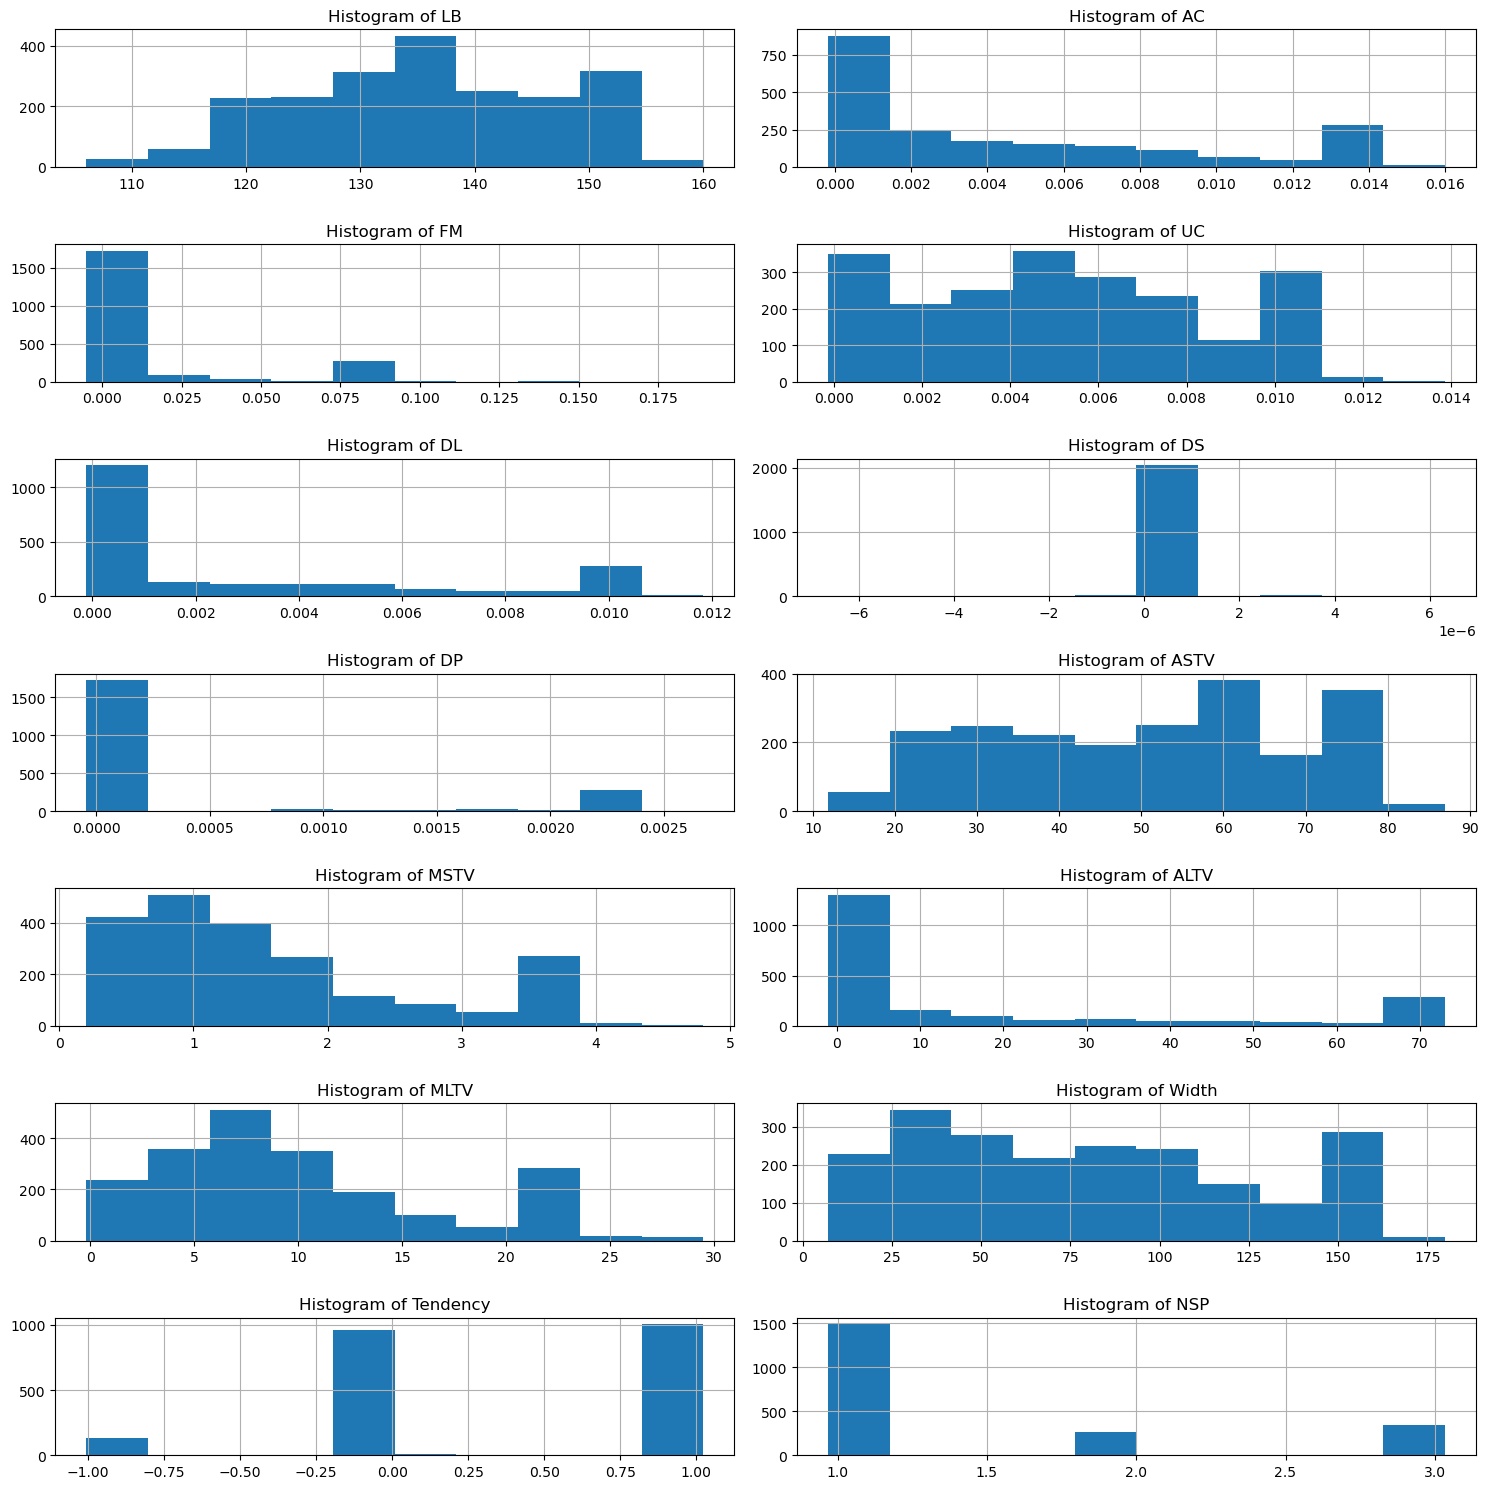

In [16]:
# Creating a 7 by 2 grid of subplots
fig, axs = plt.subplots(7, 2, figsize=(15, 15))

# Flatten the axs array for easier iteration
axs = axs.flatten()


# Iterate through each numerical column and create histograms or boxplots
for i, column in enumerate(capped_df.columns):
    capped_df[column].hist(ax=axs[i])
    axs[i].set_title(f'Histogram of {column}')

# Adjust layout to avoid overlapping titles
plt.tight_layout()
plt.show()

**2.**	Use bar charts or pie charts to display the frequency of categories for categorical variables.

In [17]:
# Filter out categorical columns
categorical_columns = capped_df.select_dtypes(include=['object']).columns

# Check if categorical columns are present
if len(categorical_columns) > 0:
    print("Categorical columns are present in the DataFrame.")
    print("List of categorical columns:")
    for column in categorical_columns:
        print("-", column)
else:
    print("No categorical columns are present in the DataFrame.")

No categorical columns are present in the DataFrame.


In the given data frame no categorical columns are present, so no need plot bar charts or pie charts to display the frequency of categories for categorical variables.

<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 4.	Pattern Recognition and Insights </h3><a id = "2.2.1" ></a>

**3.** Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

In [18]:
# # Pairwise scatter plots for numerical variables
# numerical_columns = capped_df.select_dtypes(include=['float64', 'int64']).columns
# sns.pairplot(capped_df[numerical_columns])
# plt.suptitle("Pairwise Scatter Plots for Numerical Variables", y=1.02)
# plt.show()

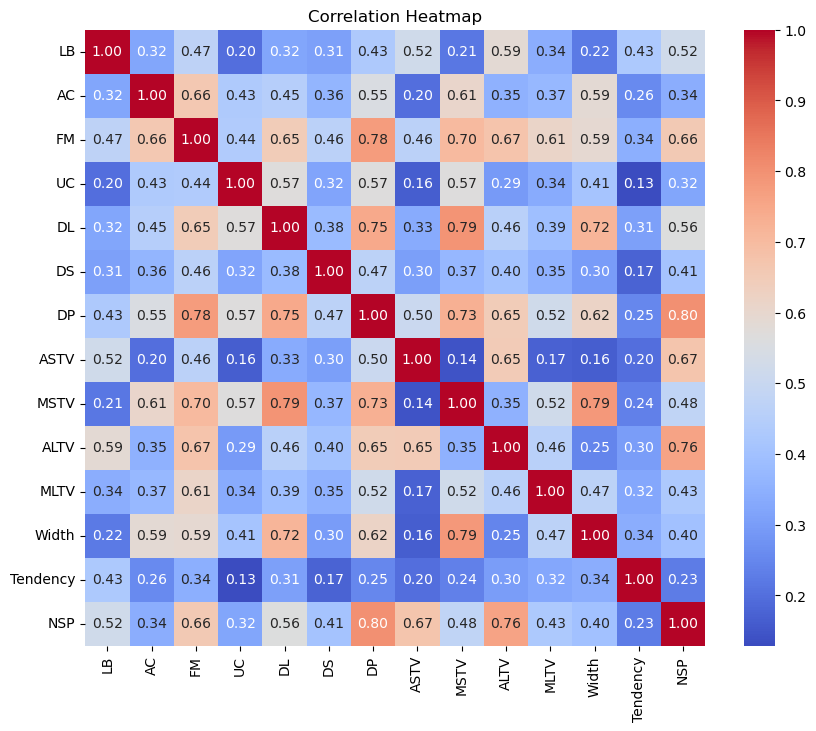

In [19]:
# Correlation heatmap
correlation_matrix = capped_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

From above heatmap:
We can say that there is a strong correlation between
1. FM and MSTV (val = 0.70)
2. Dl and DP (val = 0.75)
3. DL and MSTV (0.79)
4. Dl and Width (0.72)
5. FM and DP (0.78)
6. DP and MSTV (0.73)
7. DP and NSP (0.80)
8. ALTV and NSP (0.76)

Rest all features have moderate to low correlation.

●	Generate scatter plots to explore relationships between pairs of variables.

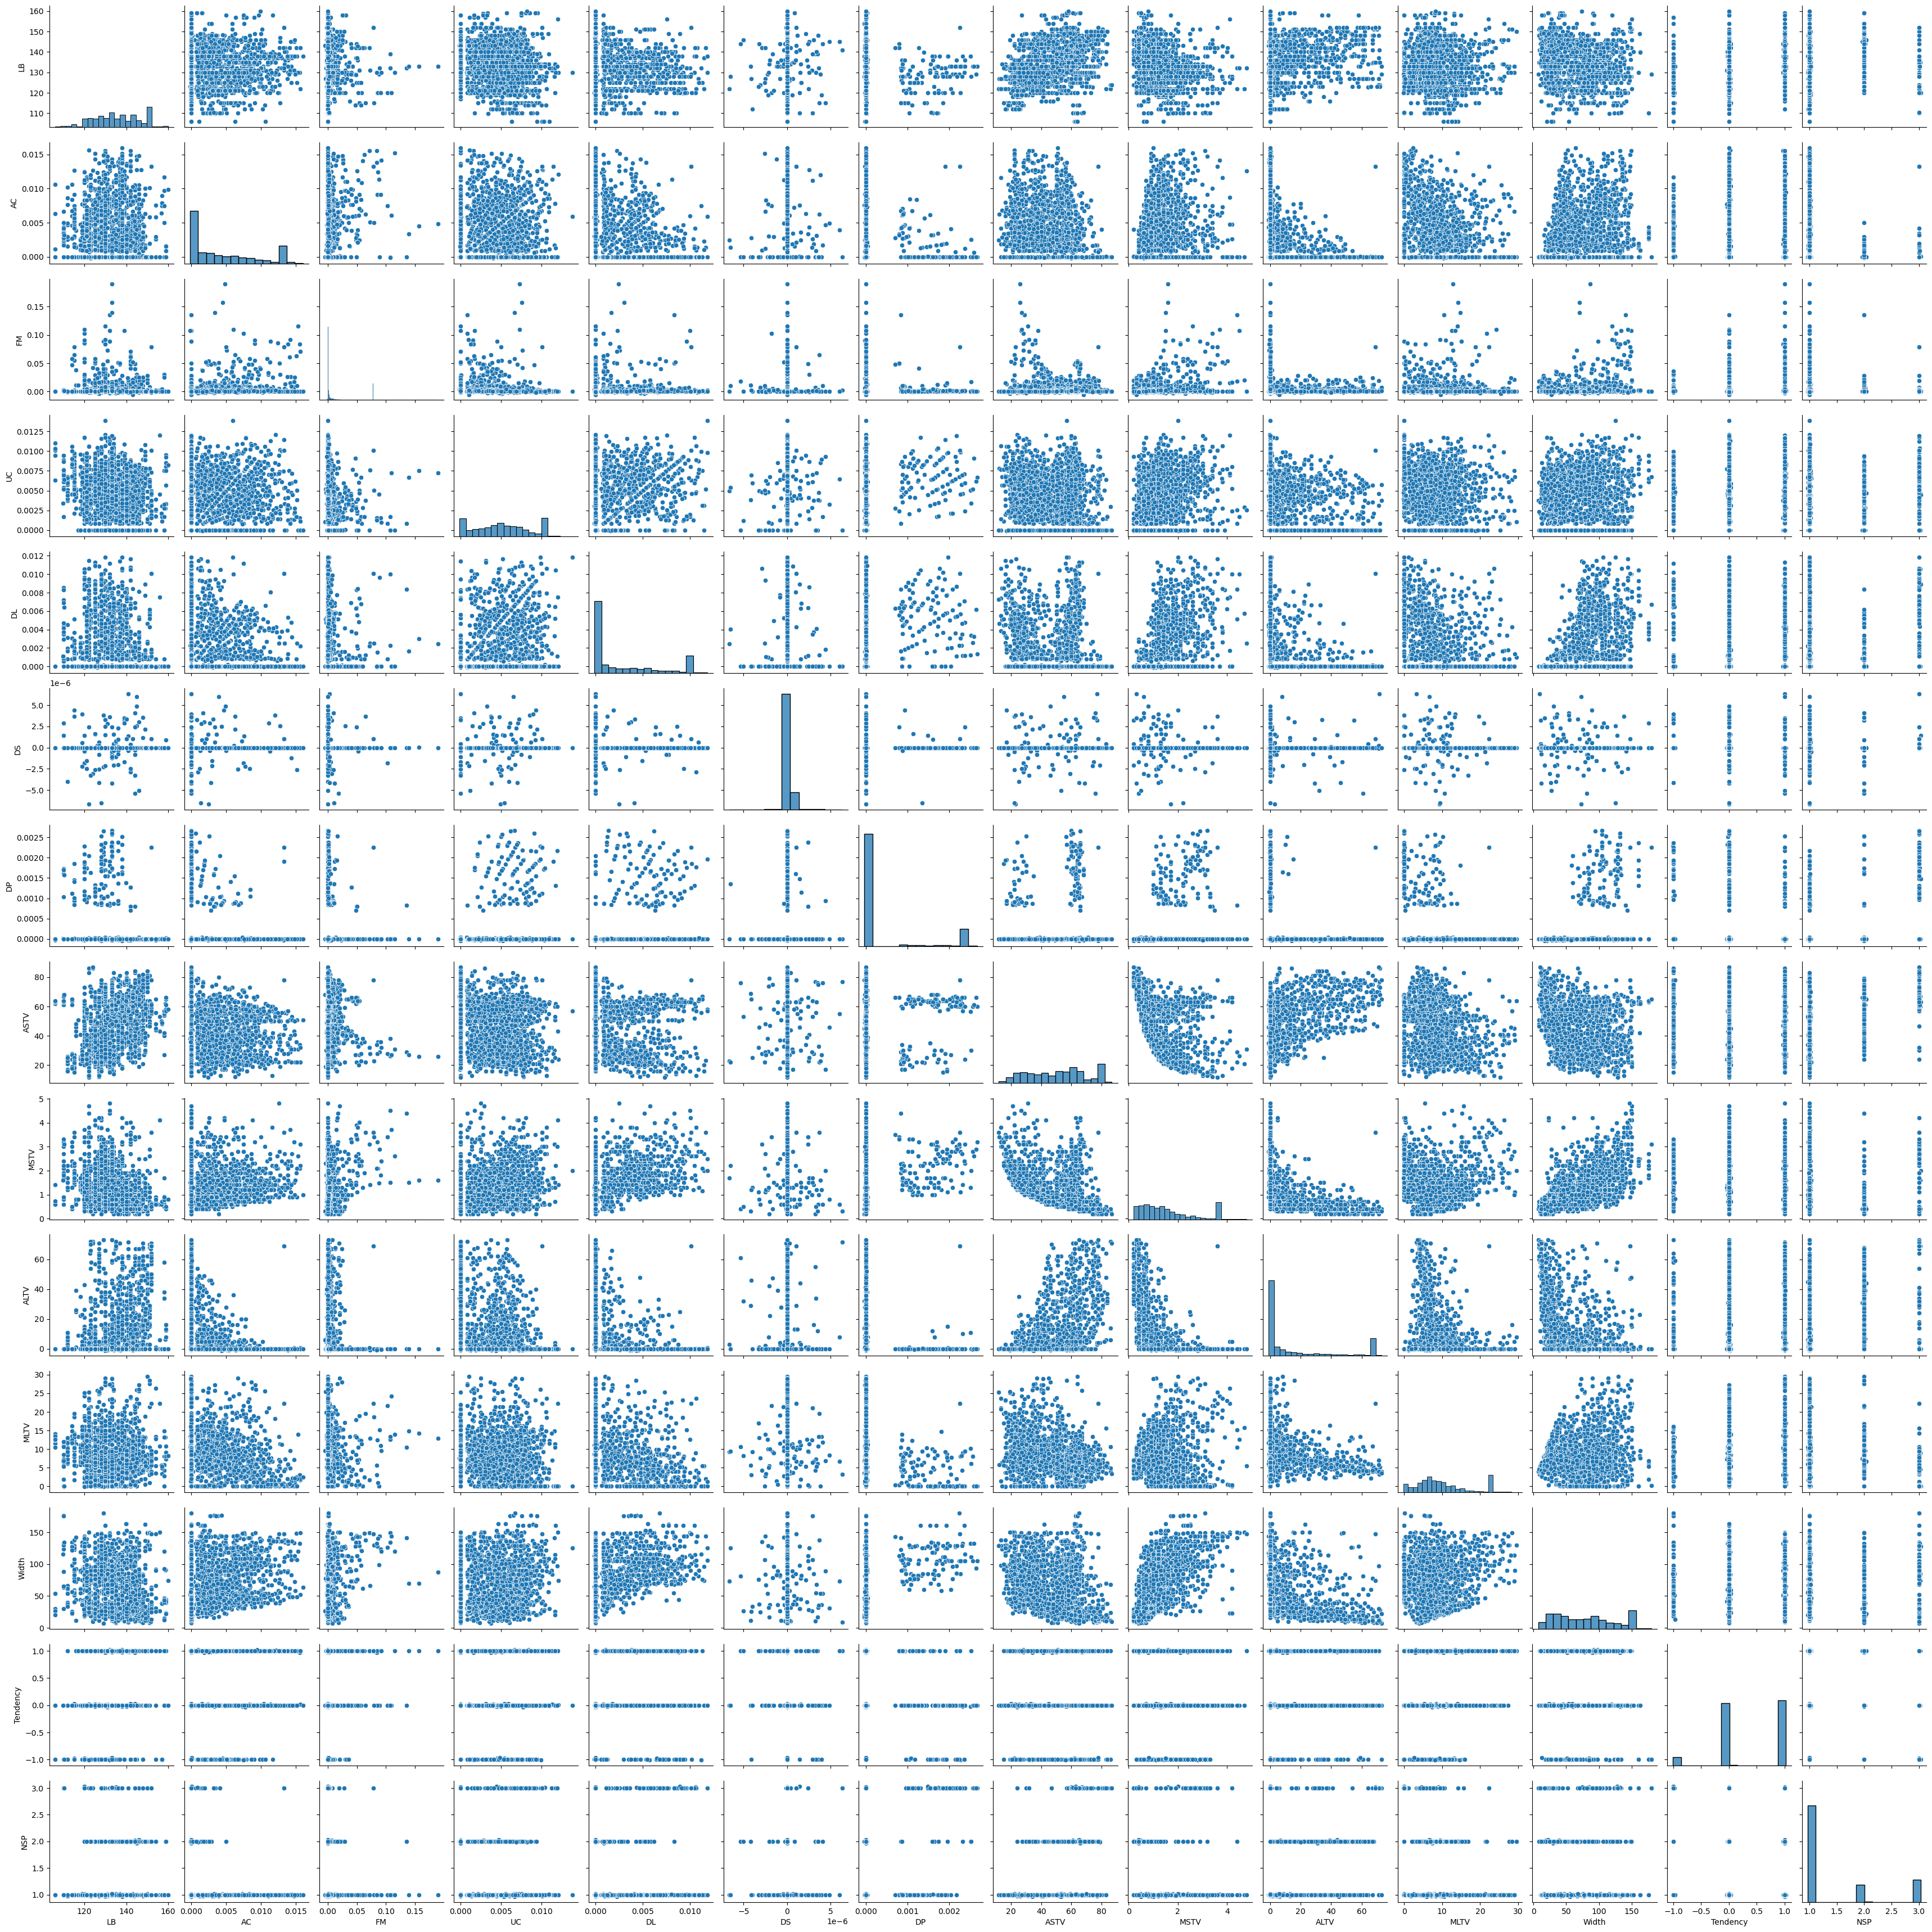

In [20]:
# Pair plot
sns.pairplot(capped_df)
plt.show()

●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

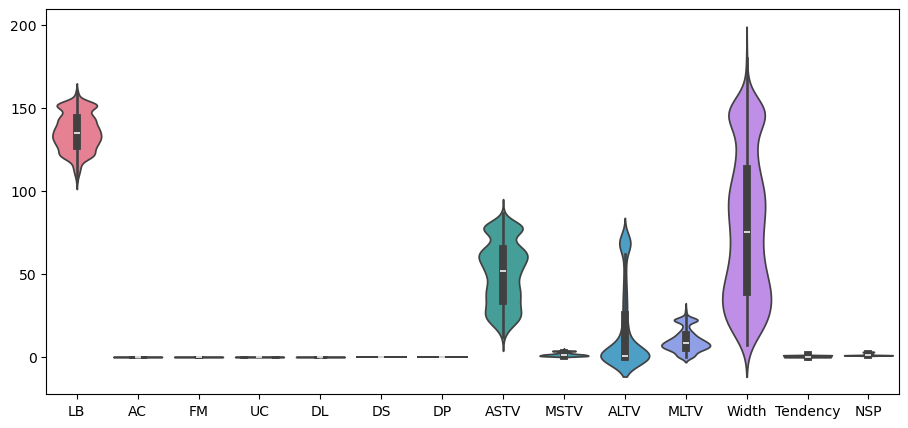

In [21]:
# Violin plot
plt.figure(figsize=(11, 5))  # Adjust the figure size as needed
sns.violinplot(data=capped_df, orient='v')
plt.show()

The above violin plot shows relationship between the features and the corresponding rates. The violin plot for LB has the median rate of greater than other featrures.

●	Look for trends or patterns over time if temporal data is available.

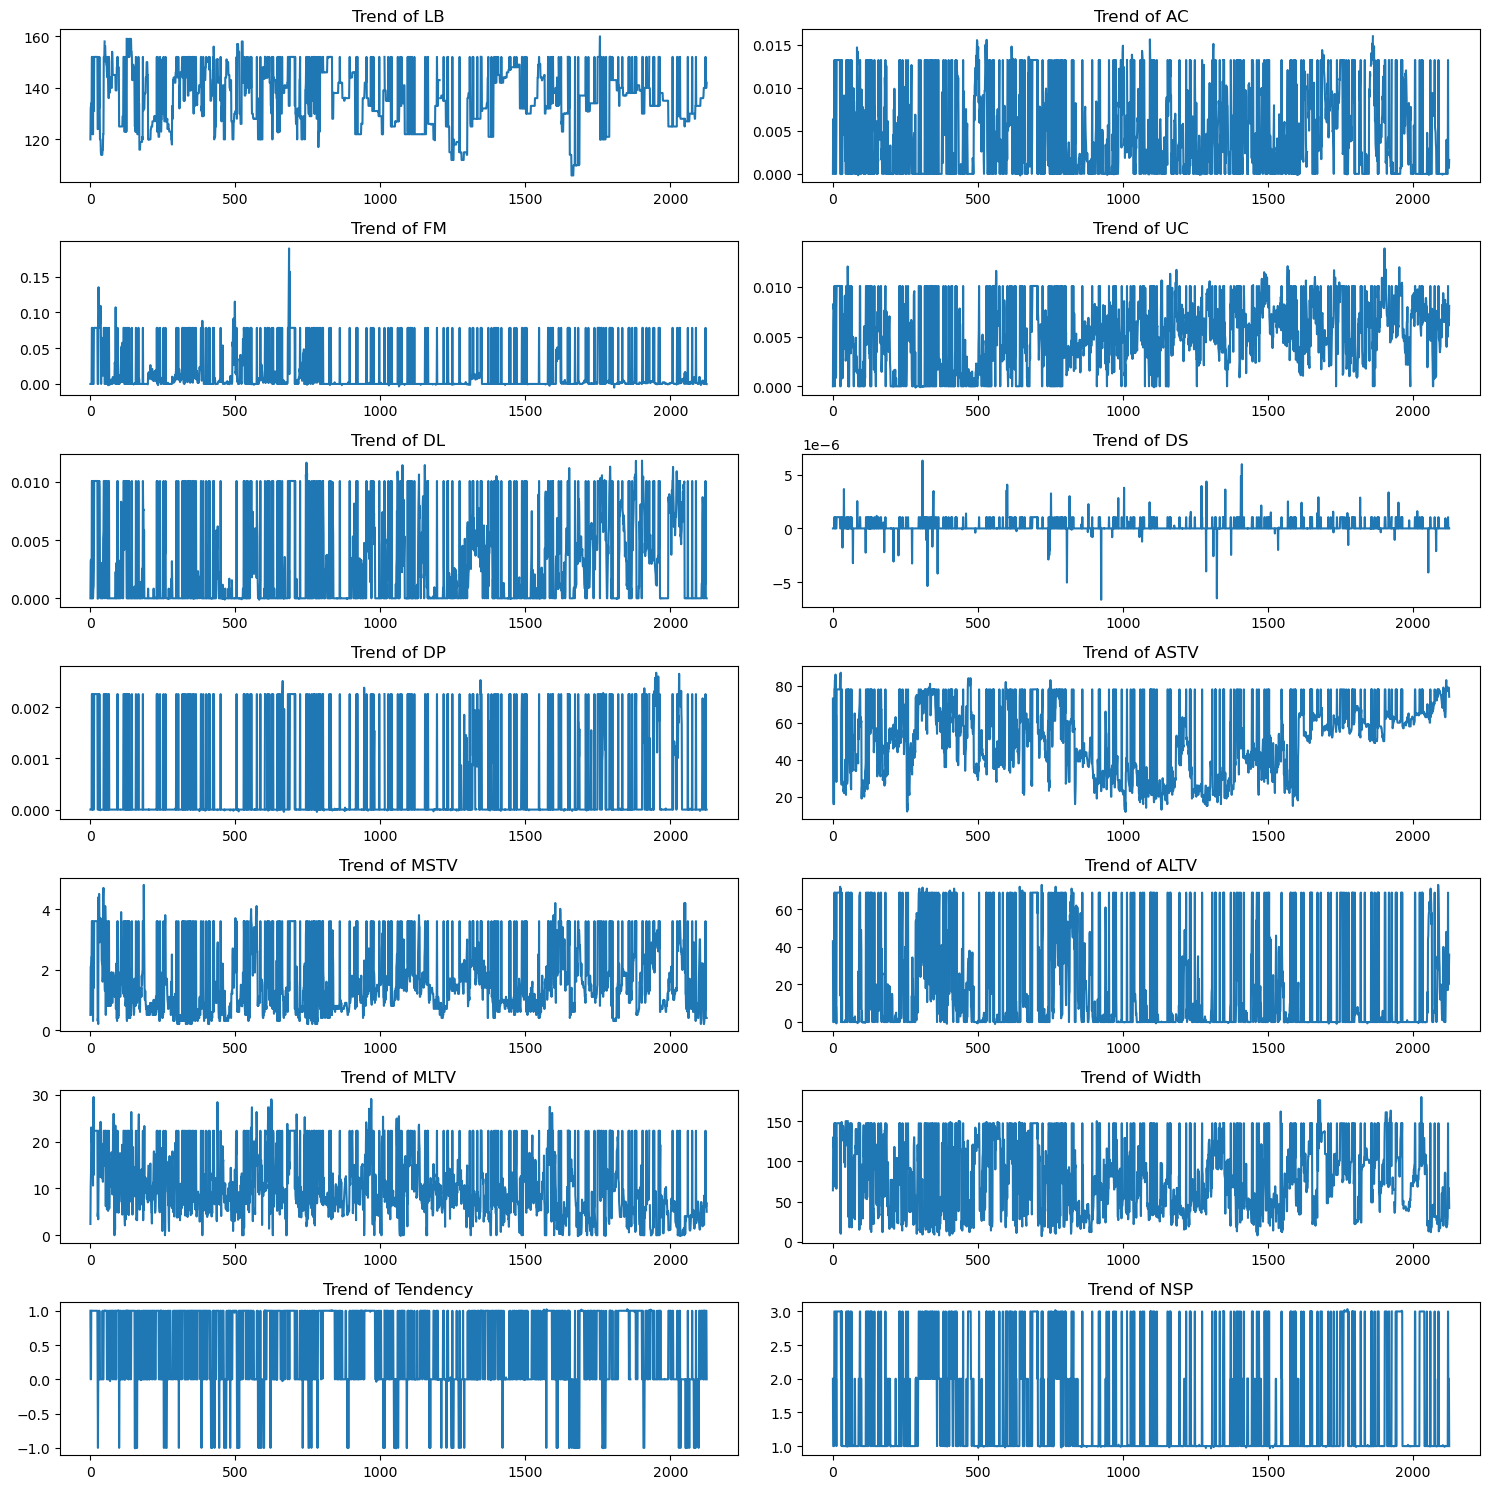

In [22]:
# Creating a 7 by 2 grid of subplots
fig, axs = plt.subplots(7, 2, figsize=(15, 15))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through each numerical column and create histograms or boxplots
for i, column in enumerate(capped_df.columns):
    axs[i].plot(capped_df.index, capped_df[column], label=column)

    axs[i].set_title(f'Trend of {column}')

# Adjust layout to avoid overlapping titles
plt.tight_layout()
plt.show()

<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 5.	Conclusions </h3><a id = "2.2.1" ></a>
1. The exploratory analysis of the cardiographic dataset has provided valuable insights into various aspects of fetal health monitoring.<br>
2. The dataset includes features such as baseline FHR, accelerations, decelerations, and variability, which are crucial indicators of fetal well-being.<br>
3. Correlations between variables highlighted important relationships, such as the impact of uterine contractions on fetal heart rate patterns.<br>

Overall, this exploratory analysis lays the groundwork for deeper investigations into fetal health monitoring and underscores the importance of data-driven approaches in clinical practice.
